In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axis as axis
import datetime
import missingno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set()

In [120]:
metrics_data = pd.read_csv('./full_data.csv')
location_data = pd.read_csv('./locations.csv')

In [121]:
metrics_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,12/31/2019,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1/1/2020,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1/2/2020,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1/3/2020,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1/4/2020,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [122]:
location_data.head()

,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0


# Jordan

In [123]:
jordan = metrics_data[metrics_data.loc[:,'location'] =='Jordan']

In [124]:
jordan.shape

(145, 10)

In [125]:
jordan.dropna(axis=0, inplace=True) # Drop the NULL records ( Which are the very few days in the start of COVID-19)

In [126]:
jordan['new_cases'] = np.where(jordan['new_cases'] <=0, 0, jordan['new_cases'])

In [127]:
jordan.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
17684,8/8/2020,Jordan,5.0,0.0,1237.0,11.0,44.0,0.0,91.0,0.0
17685,8/9/2020,Jordan,9.0,0.0,1246.0,11.0,52.0,0.0,92.0,0.0
17686,8/10/2020,Jordan,6.0,0.0,1252.0,11.0,39.0,0.0,84.0,0.0
17687,8/11/2020,Jordan,16.0,0.0,1268.0,11.0,50.0,0.0,92.0,0.0
17688,8/12/2020,Jordan,15.0,0.0,1283.0,11.0,59.0,0.0,101.0,0.0


In [128]:
jordan.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
17539,3/16/2020,Jordan,14.0,0.0,15.0,0.0,14.0,0.0,15.0,0.0
17540,3/17/2020,Jordan,1.0,0.0,16.0,0.0,15.0,0.0,15.0,0.0
17541,3/18/2020,Jordan,19.0,0.0,35.0,0.0,34.0,0.0,34.0,0.0
17542,3/19/2020,Jordan,17.0,0.0,52.0,0.0,51.0,0.0,51.0,0.0
17543,3/20/2020,Jordan,4.0,0.0,56.0,0.0,55.0,0.0,55.0,0.0


Text(2020-05-11 00:00:00, 9.2, 'No Deaths')

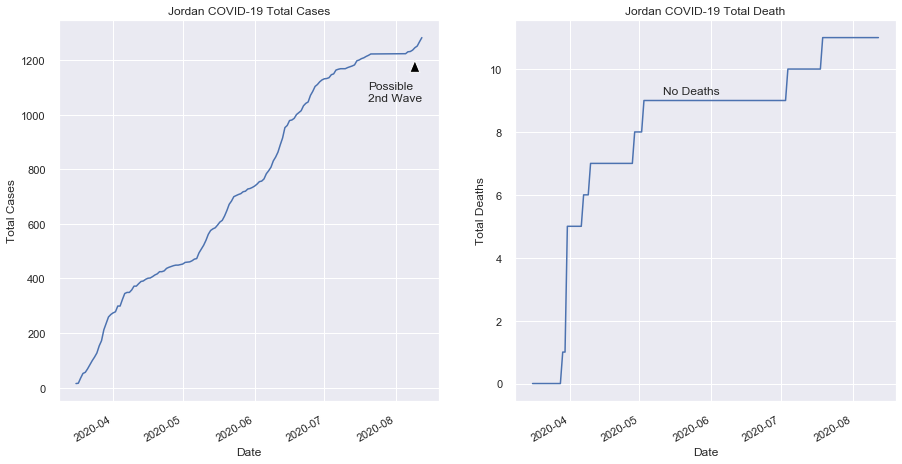

In [401]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))

dates = [datetime.datetime.strptime(d, "%m/%d/%Y") for d in jordan['date']]
ax1.plot(dates, jordan['total_cases'])
ax1.set(title='Jordan COVID-19 Total Cases', xlabel = 'Date', ylabel= 'Total Cases')
ax2.plot(dates, jordan['total_deaths'])
ax2.set(title='Jordan COVID-19 Total Death', xlabel = 'Date', ylabel= 'Total Deaths')
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right");
plt.setp(ax2.get_xticklabels(), rotation=30, ha="right");
ax1.annotate(' ', xy=(dates[-4], 1200),arrowprops=dict(facecolor='black', shrink=0.05,headwidth = 10))
ax1.annotate('Possible\n2nd Wave ', xy=(dates[-10], 1050))
ax2.annotate('No Deaths', xy=(dates[-80], 9.2))

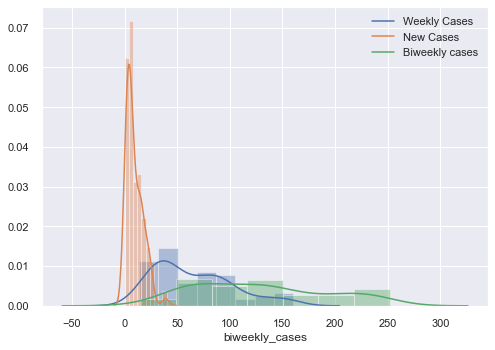

In [404]:

sns.distplot(jordan['weekly_cases'], kde_kws={'label': 'Weekly Cases'})
sns.distplot(jordan['new_cases'], kde_kws={'label': 'New Cases'})
sns.distplot(jordan['biweekly_cases'], kde_kws={'label': 'Biweekly cases'})

In [348]:
total_cases = pd.read_csv('./total_cases.csv')

In [349]:
total_cases = total_cases.iloc[-1,:]
total_cases

date              2020-08-13
World               20614014
Afghanistan            37345
Albania                 6817
Algeria                36699
                     ...    
Vietnam                  883
Western Sahara           766
Yemen                   1841
Zambia                  8501
Zimbabwe                4893
Name: 226, Length: 212, dtype: object

In [350]:
total_cases = pd.DataFrame(total_cases)
total_cases_country = total_cases.drop(['date','World'])

In [351]:
total_cases_country.columns = ['Cases']
total_cases_country.loc['Spain', 'Cases'] = 329784
total_cases_country.sort_values(by = 'Cases',ascending=False,inplace=True)


In [352]:
total_cases_country

,Cases
United States,5197148
Brazil,3164785
India,2.39664e+06
Russia,902701
South Africa,568919
...,...
Falkland Islands,13
Vatican,12
British Virgin Islands,9
Anguilla,3


In [353]:
total_cases_country = total_cases_country.reset_index(drop=False)

In [354]:
total_cases_country.columns = ['Country','Cases']
total_cases_country

,Country,Cases
0,United States,5197148
1,Brazil,3164785
2,India,2.39664e+06
3,Russia,902701
4,South Africa,568919
...,...,...
205,Falkland Islands,13
206,Vatican,12
207,British Virgin Islands,9
208,Anguilla,3


Text(Jordan, 100000, 'Jordan')

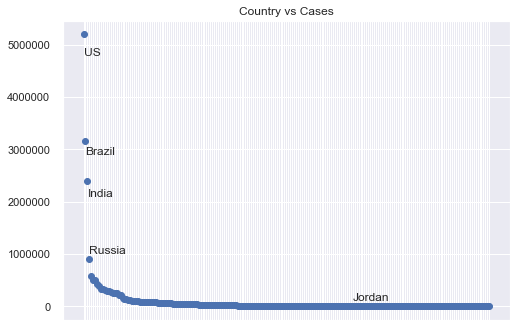

In [421]:
plt.scatter(total_cases_country['Country'], total_cases_country['Cases'])
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.title('Country vs Cases')
plt.annotate('US', xy=('United States', 4800000))
plt.annotate('Brazil', xy=('Brazil', 2900000))
plt.annotate('India', xy=('India', 2100000))
plt.annotate('Russia', xy=('Russia', 1000000))
plt.annotate('Jordan', xy=('Jordan', 100000))

In [355]:
total_cases_country.dropna(axis=0, inplace=True)

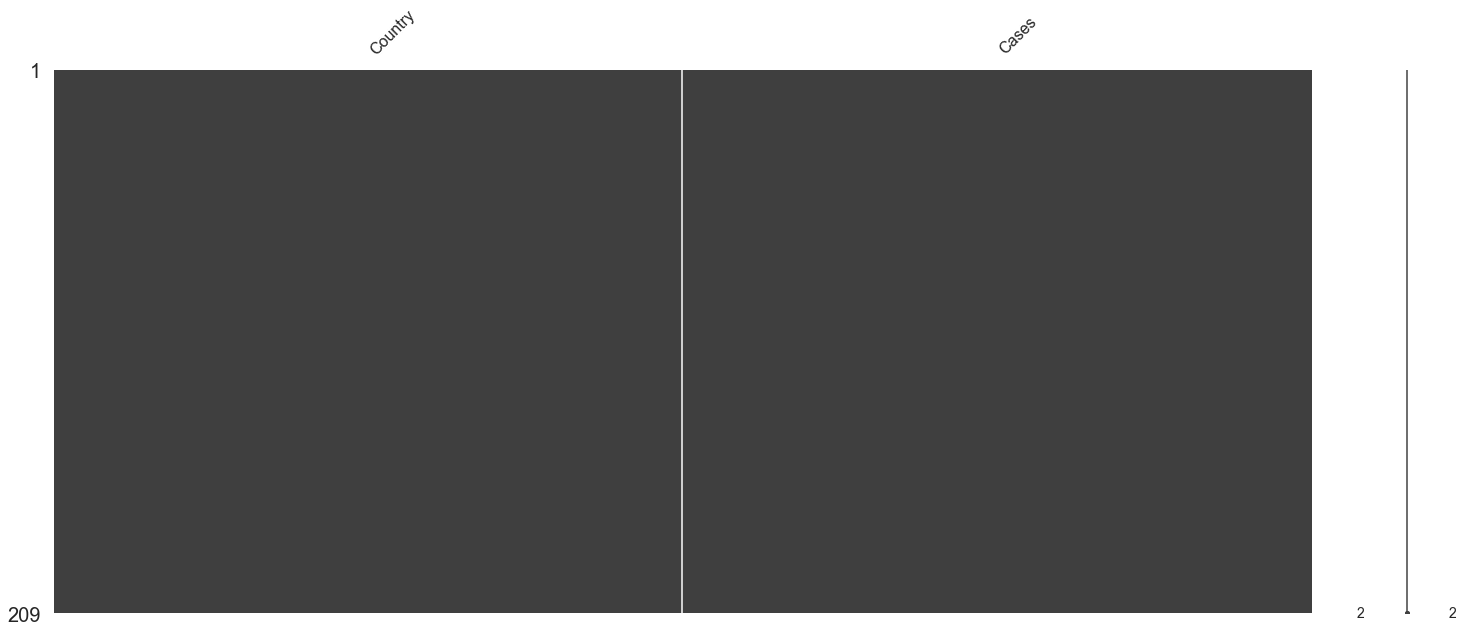

In [356]:
missingno.matrix(total_cases_country)

In [369]:
print('The rank of Jordan in terms of the Number of Cases:' , list(total_cases_country[total_cases_country.loc[:,'Country'] == 'Jordan'].index))

The rank of Jordan in terms of the Number of Cases: [138]
